# Анализ данных для интернет-магазина «Стримчик»

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании  на 2017 год. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План работ:
- подготовка данных: замена названий столбцов, замена типов данных, обработка пропусков, проверка на дубликаты
- исследовательский анализ данных: анализ продаж за все время, лидеры продаж за все время, потенциально прибыльные платформы, влияние рейтингов на продажи
- портрет пользователей: предпочтения пользователей в Северной Америке, Японии и Европе
- влияние рейтинга ESRB на продажи
- проверка гипотез


## Общие сведения

Импортируем библиотеки, которые понадобятся для анализа данных:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st 


Откроем файл с данными и изучим сведения:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Уже видно, что данные представлены не полностью: например, в столбцах 'Year_of_Release' и 'Critic_Score' меньше данных, чем в столбцах 'Platform' или 'NA_sales'.   
Также в некоторых столбцах нужно будет изменить тип значений: например, год выпуска должен быть целым числом, соответственно, нужно будет поменять тип данных на int.


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


C помощью фукции head() можно вывести первые 10 строк датасета. В каждой строке содержится название игры, платформа, год выпуска, жанр игры, данные по продажам игры, оценка критиков и пользователей, а также рейтинг от организации ESRB.

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Функция describe() помогает узнать, что данные по продажам представлены полностью, и в Северной Америке продажи прошли наиболее успешно.

## Подготовка данных


### Замена названий столбцов

Приведем к нижнему регистру названия столбцов:

In [5]:
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Проверка на дубликаты

Убедимся, что в датасете нет полных дубликатов:

In [6]:
data.duplicated().sum()

0

### Обработка пропусков

С помощью функции isna() проверим, сколько пропусков есть в каждом столбце:

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проверим столбцы 'name' и 'genre' с пропусками: 

In [8]:
display (data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
display (data[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видно, что игры были выпущены в 1993 году, и игра в строке 659 была популярна в Северной Америке. Но названия игр, жанры, оценки и рейтинги в этих двух строках отсутствуют, поэтому лучше избавиться от этих двух строк, так как они не несут практически никакой полезной информации. Вероятно, эти данные в таблице - одни из самых старых, когда еще не осуществлялся сбор оценок, поэтому  данные отсутствуют.  

Удалим из датасета обе строки:

In [10]:
data.dropna(subset=['name'], inplace=True)

Проверим строки с пропущенным годом выпуска:

In [11]:
display ( data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Строк с пропущенным годом выпуска 269. По-видимому, год выпуска игр не заполнялся для игр, выпущенных в начале 2000х. Эти строки тоже лучше удалить:

In [12]:
data.dropna(subset=['year_of_release'], inplace=True)


Рейтинг для многих игр отсутствует, так как он мог не собираться для всех игр, или данные не были перенесены конкретно в этот датасет.
Не будем заполнять пропущенные данные в рейтингах, так как это может привести к искажению данных. Рейтинг присваивается каждой игре индивидуально и непосредственно связан с уровнем продаж. Заменим пропущенные значения в рейтингах на 'unknown'.

Проверим уникальные значения в столбце 'user_score':

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Tbd означает 'to be determined', то есть рейтинг еще не присвоен, и это значение можно приравнять к NaN через функцию 'errors - coerce'.

In [14]:
data['critic_score'] = data['critic_score'].apply(pd.to_numeric, errors='coerce')
data['user_score'] = data['user_score'].apply(pd.to_numeric, errors='coerce')


data['critic_score'] = data['critic_score'].fillna('unknown')
data['user_score'] = data['user_score'].fillna('unknown')
data['rating'] = data['rating'].fillna('unknown')

In [15]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

В итоге, в датасете не осталось пропусков.

### Замена типов данных

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


Заменим типы значений в следующем столбце:

'year_of_release'  - c 'float64' на 'int', так как числа в этих столбцах должны быть целыми; 

'user_score', 'critic_score', ' rating ' теперь содержат strings, поэтому должны оставаться типом object. Позже понадобится отфильтровать их,  тип значений заменим после фильтрации.

Оставим тип 'float'  в данных по продажам, так как счет идет в миллионах копий, и числа также не всегда являются целыми.

In [17]:
data['year_of_release'] = data['year_of_release'].astype('Int64')


Проверим, что типы данных заменились на нужные:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(4), object(6)
memory usage: 1.5+ MB


Проверим, что 'tbd' в 'user_score' превратилось в 'unknown':

In [19]:
data['user_score'].unique()

array([8.0, 'unknown', 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9.0,
       7.9, 8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6,
       7.2, 9.2, 7.0, 7.3, 4.3, 7.6, 5.7, 5.0, 9.1, 6.5, 8.8, 6.9, 9.4,
       6.8, 6.1, 6.7, 5.4, 4.0, 4.9, 4.5, 9.3, 6.2, 4.2, 6.0, 3.7, 4.1,
       5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, 3.0, 2.7, 2.2, 2.0, 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       0.0, 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3,
       0.2, 0.6, 1.4, 0.9, 1.0, 9.7], dtype=object)

### Cуммарные продажи во всех регионах

Создадим столбец с суммарными продажами по всем регионам: 'all_sales_total':

In [20]:
data['all_sales_total'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Проверим, что столбец создался:

In [21]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,unknown,unknown,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,unknown,unknown,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,unknown,unknown,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,unknown,unknown,unknown,28.31


### Вывод

Мы подготовили данные к дальнейшей обработке:
- названия столбцов приведены к нижнему регистру
- некоторые типы данных заменены на нужные
- обработали пропуски там, где это было нужно. В рейтингах пропуски заменили на unknown,  так как замена числами может повлиять на результаты анализа.
- был создан столбец с суммарными продажами по регионам


## Исследовательский анализ данных

#### Количество игр с 1980 по 2016 годы и лидеры продаж за весь период.

Посмотрим, сколько игр выпускалось в разные годы. Видно, что до 1995 года количество игр, выпускаемых ежегодно, не превышало 200. Резкий рост начался с 1993 года и продолжался вплоть до 2009, когда было выпущено более 1400 игр. Затем начался спад, который продолжился до 2016 года.

В дальнейшем мы можем не принимать во внимание данные до 1990 года, так как количество игр, выпущенных в те годы, незначительно.

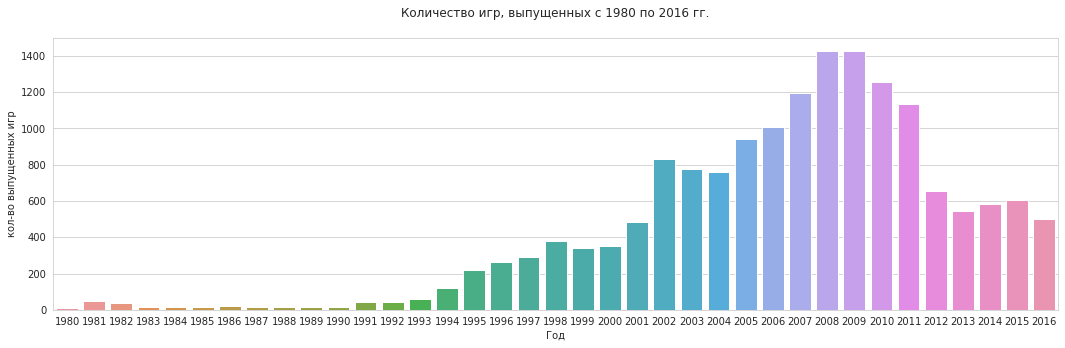

In [22]:
plt.figure(figsize=(18,5))
sns.set_style('whitegrid')
sns.countplot(data = data, x='year_of_release')

plt.title('Количество игр, выпущенных с 1980 по 2016 гг.'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во выпущенных игр');
plt.show()

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам:

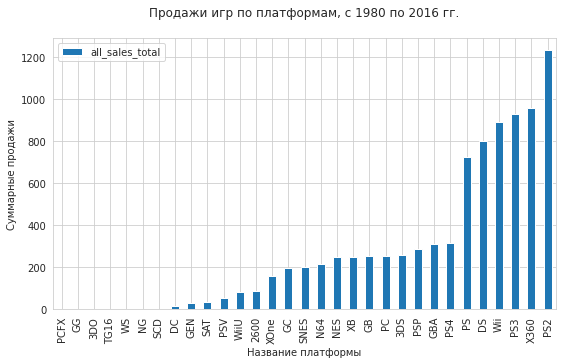

In [23]:
(data
 .pivot_table(index='platform', values='all_sales_total', aggfunc='sum')
 .sort_values('all_sales_total', ascending=True)
 .plot(kind='bar', figsize=(9,5),  style = 'o-', grid=True)
)

plt.title('Продажи игр по платформам, с 1980 по 2016 гг.'+ "\n")
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')
plt.show()

Для построения графика с распределением по годам, оставим только топ-6 платформ: PS2, X360, PS3, Wii, DS, PS.

In [24]:
top_platforms = data.groupby('platform') ['all_sales_total'].sum()
top_platforms = pd.DataFrame(top_platforms)
top_platforms = top_platforms.query('all_sales_total > 400').sort_values('all_sales_total', ascending=False).reset_index()
top_platforms.head(10)

,platform,all_sales_total
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


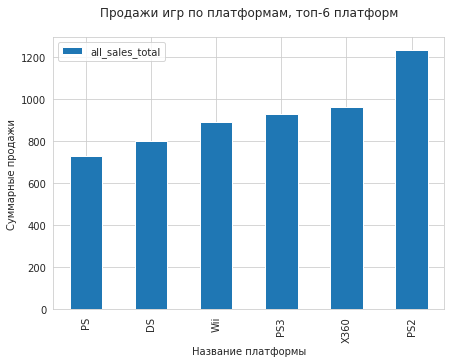

In [25]:
(top_platforms
 .sort_values('all_sales_total', ascending=True)
 .reset_index()
 .plot(kind='bar', x='platform', y = 'all_sales_total', figsize=(7,5), grid='True')
)

plt.title('Продажи игр по платформам, топ-6 платформ'+ "\n")
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')
plt.show()

#### Жизненные циклы для топ-6 платформ, весь период

Проанализируем данные из общего датасета по годам, только для этих 6 платформ:

In [26]:
top_platforms['platform'].unique()

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

In [27]:
top_platforms_names = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
data_top_platforms = data.query('platform in @top_platforms_names')

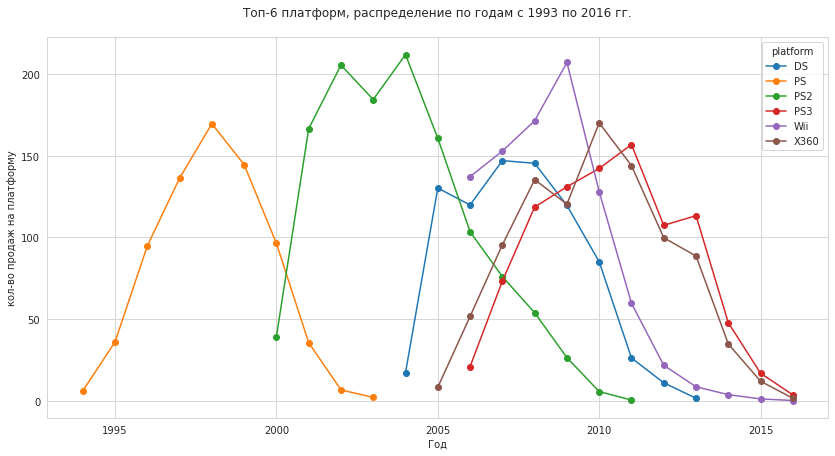

In [28]:
(data_top_platforms 
 .query('year_of_release > 1990')
 .pivot_table(index='year_of_release', columns='platform', values='all_sales_total', aggfunc='sum') 
 .plot(kind='line', figsize=(14,7),  style = 'o-', grid=True)
)
plt.title('Tоп-6 платформ, распределение по годам с 1993 по 2016 гг.'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во продаж на платформу');


На графике видны пики продаж для каждой из топ-6 приставок. Видно, что каждая платформа проходит свой пик популярности, после чего продажи начинают падать. В среднем, 'жизненный цикл'  платформы составляет около 10 лет.

#### Тепловая карта

Построим тепловую карту, на которой также отразим жизненный цикл платформ. На тепловой карте тоже видно, что в среднем цикл длится около 10 лет с пиком продаж посередине. Пик продаж на тепловой карте обозначен самым темным цветом:

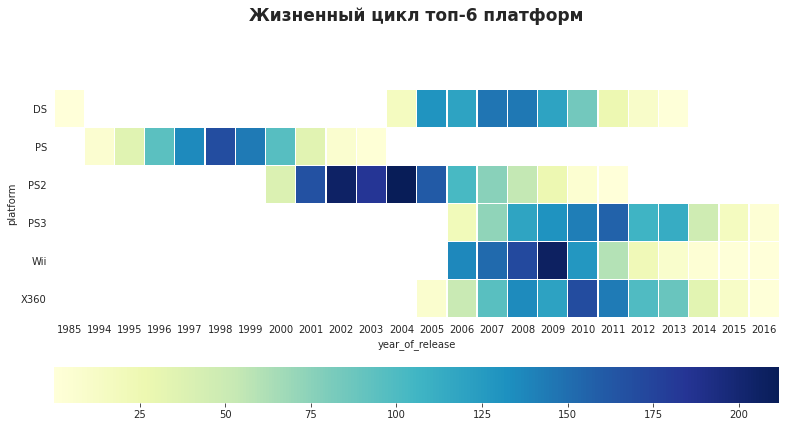

In [29]:
data_top_platforms = data_top_platforms.pivot_table(index='year_of_release', columns='platform', values='all_sales_total', aggfunc='sum').T 
data_top_platforms.head(5)

plt.figure(figsize = (13,6))
plt.title('Жизненный цикл топ-6 платформ' + 3 * '\n', fontsize=17, weight='bold')
ax = sns.heatmap(data_top_platforms, cmap="YlGnBu", cbar_kws={"orientation": "horizontal"}, linewidths=.3)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)
plt.show()

#### Лидеры продаж за 2016 год. Рост и падение платформ за актуальный период.   Потенциально прибыльные платформы.

Возьмем данные за соответствующий актуальный период, чтобы спланировать продажи на 2017 год. Актуальным периодом будем считать данные с 2013 года, так как данные  за 4-летний  период могут точно указать, куда идет тенденция продаж - на рост или на падение. Четырех точек на графике будет достаточно, чтобы понять тенденцию. 

В то же время, для выбора платформ для продажи на 2017 год, нет смысла ориентироваться на данные трехлетней давности - нужно брать только самые свежие данные за 2016 год. В 2017 году выгоднее всего будет продавать игры для платформ - лидеров продаж за 2016 год, даже если кривая продаж идет на спад. 

Поэтому будем использовать данные за 2016 год для поиска популярных жанров и платформ, и данные за последние три года - для выявления общих тенденций (влияние рейтингов, тенденции продаж).


In [30]:
data_actual = data.query('year_of_release > 2012')

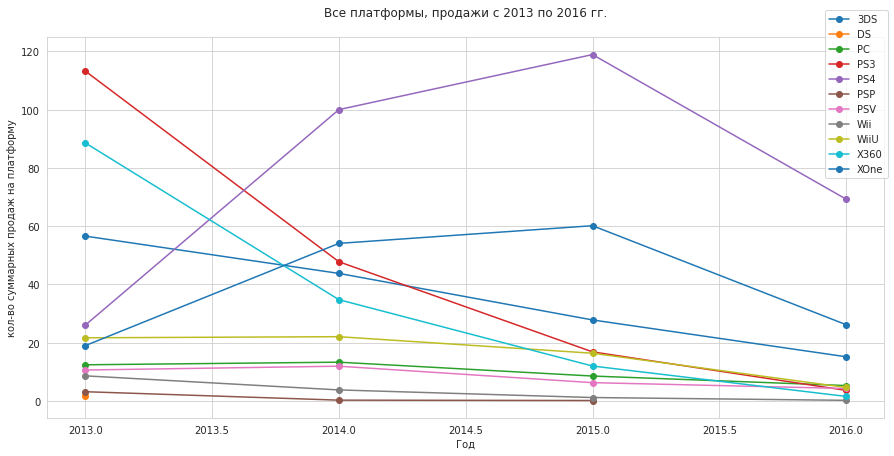

In [31]:
(data_actual 
 .pivot_table(index='year_of_release', columns='platform', values='all_sales_total', aggfunc='sum') 
 .plot(kind='line', figsize=(15,7),  style = 'o-', grid=True)
)
plt.title('Все платформы, продажи с 2013 по 2016 гг.'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во суммарных продаж на платформу')
plt.legend(bbox_to_anchor=(1.01,0.85), loc="center right");

Видно, что в целом тенденция продаж идет на спад. Нет ни одного графика, где продажи бы выросли между 2015 и 2016 годом. Однако есть еще несколько платформ, где потенциал продаж не полностью исчерпан. Это платформы, лидирующие по продажам в 2016 году: PS4, 3DS, XOne. 

Рассмотрим подробнее графики нижней части:

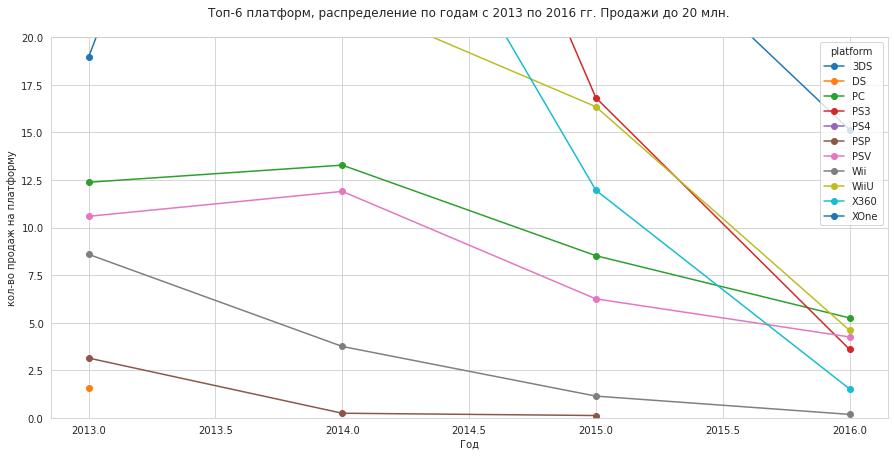

In [32]:
(data_actual 
 .pivot_table(index='year_of_release', columns='platform', values='all_sales_total', aggfunc='sum') 
 .plot(kind='line', figsize=(15,7),  style = 'o-', grid=True)
)
plt.title('Tоп-6 платформ, распределение по годам с 2013 по 2016 гг. Продажи до 20 млн.'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во продаж на платформу')
plt.ylim(0, 20)
plt.show()

В нижней части графика также заметен общий спад продаж. Результаты продаж примерно одинаковы у платформ PC, WiiU, PSV, PS3 - порядка 5 млн копий за 2016 год.   
Построим таблицу лидеров продаж за 2016 год:

In [33]:
data_2016 = data.query('year_of_release == 2016')
data_2016_top_platforms = data_2016.pivot_table(index='platform', values='all_sales_total', aggfunc='sum').sort_values('all_sales_total', 
                                                                                        ascending=False).reset_index()
data_2016_top_platforms.head(10)


,platform,all_sales_total
0,PS4,69.25
1,XOne,26.15
2,3DS,15.14
3,PC,5.25
4,WiiU,4.60
5,PSV,4.25
6,PS3,3.60
7,X360,1.52
8,Wii,0.18


В 2016 году по продажам лидировали PS4, XOne, 3DS.

Построим диаграмму размаха  по глобальным продажам игр в 2016 году в разбивке по платформам:

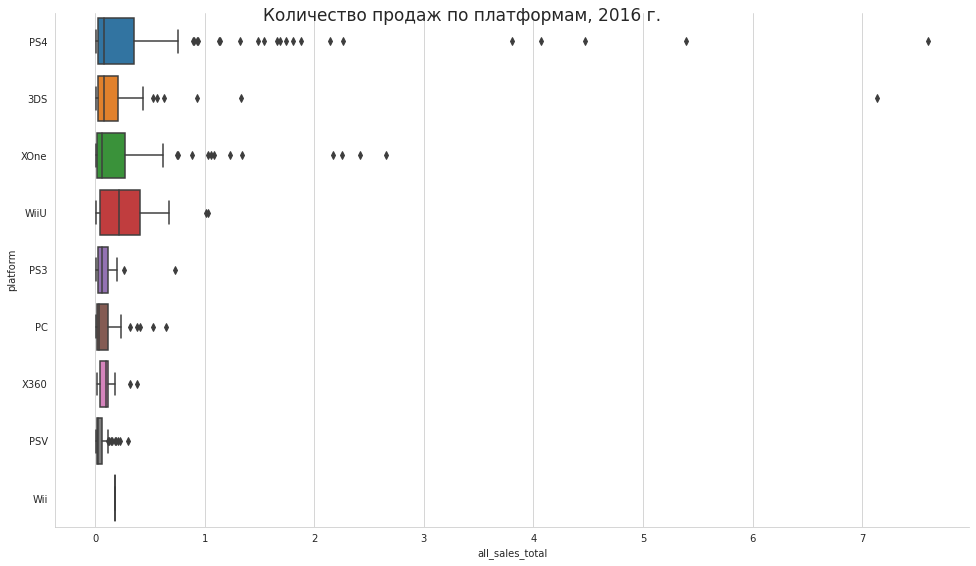

In [34]:
data_actual_catplot = data.query('year_of_release > 2015')
g = sns.catplot(y='platform', x='all_sales_total', data=data_actual_catplot, kind='box');
#g.set(xlim=(0, 2))
fig = plt.gcf()
fig.set_size_inches(15, 8)
fig.suptitle('Количество продаж по платформам, 2016 г.' +'\n'+'\n', fontsize=17);

Видны большие выбросы у PS3 и других платформ. Сократим лимит по оси x, чтобы лучше увидеть диаграммы размаха:

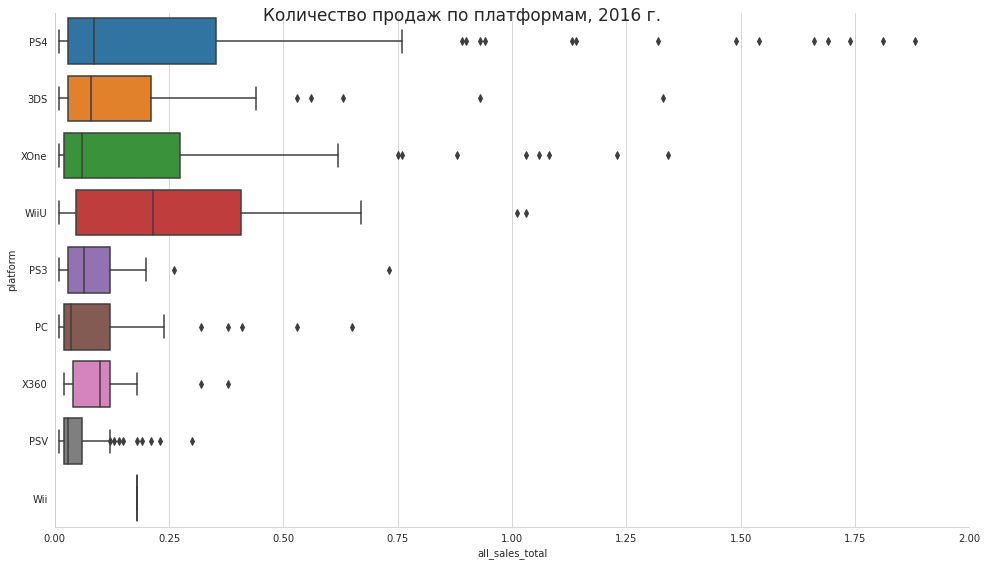

In [35]:
data_actual_catplot = data.query('year_of_release > 2015')
g = sns.catplot(y='platform', x='all_sales_total', data=data_actual_catplot, kind='box');
g.set(xlim=(0, 2))
fig = plt.gcf()
fig.set_size_inches(15, 8)
fig.suptitle('Количество продаж по платформам, 2016 г.' + '\n', fontsize=17);

Видно, что на диаграмме размаха в лидерах опять находятся PS4, XOne, 3DS. За счет почти полного отсутствия выбросов, сравнимая с лидерами диаграмма получилась и у платформы WiiU. Хотя по суммарному объему продаж она находится на 5 месте, после PC, медиана продаж у нее самая высокая. Результаты диаграммы WiiU говорят о равномерности доходов по этой платформе. Эта платформа также может быть включена в план продаж на 2017 год.

#### Влияние  отзывов пользователей и критиков на продажи, на примере платформы PS4. 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами на актуальных данных с 2013 года:

In [36]:
data_ps4 = data_actual.query('platform == "PS4" & critic_score != "unknown" & user_score != "unknown"')
data_ps4 = data_ps4[[ 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'all_sales_total']].copy()
data_ps4['critic_score'] = data_ps4['critic_score'].astype('int')
data_ps4['user_score'] = data_ps4['user_score'].astype('float')

data_ps4.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales_total
na_sales,1.000000,0.714988,0.530480,0.915292,0.414241,-0.022577,0.893807
eu_sales,0.714988,1.000000,0.519826,0.935136,0.346044,-0.050671,0.951656
jp_sales,0.530480,0.519826,1.000000,0.566734,0.322057,0.174512,0.592214
other_sales,0.915292,0.935136,0.566734,1.000000,0.408465,-0.037332,0.997798
critic_score,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405895
user_score,-0.022577,-0.050671,0.174512,-0.037332,0.557654,1.000000,-0.033625
all_sales_total,0.893807,0.951656,0.592214,0.997798,0.405895,-0.033625,1.000000


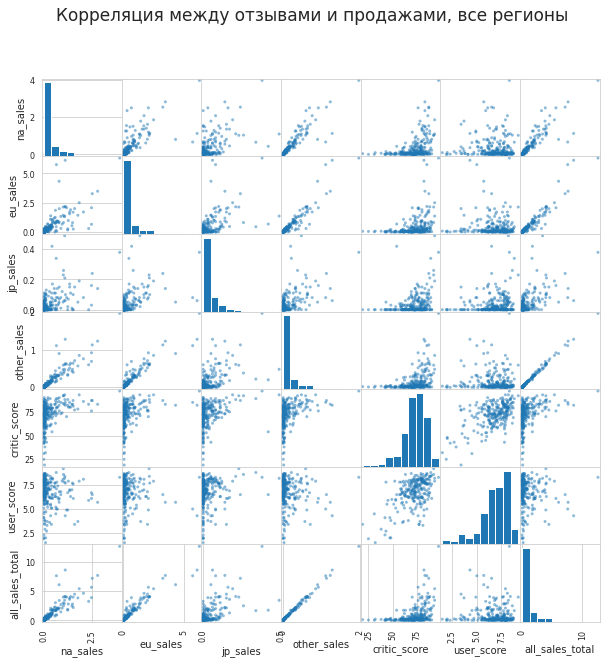

In [37]:
pd.plotting.scatter_matrix(data_ps4, figsize=(10,10), alpha=0.5)
plt.suptitle('Корреляция между отзывами и продажами, все регионы', fontsize=17);

В целом, продажи во всех регионах больше коррелируют с отзывами критиков и меньше - с отзывами пользователей. Чем выше рейтинг игры по оценкам критиков, тем выше количество продаж. Особенно сильна корреляция рейтинга критиков и продаж в Северной Америке (0.41) и в 'других' регионах (0.41).
Рейтинг пользователей и продаж коррелирует не так сильно и близок к нулю практически во всех регионах, кроме Японии. В Японии корреляция рейтинга пользователей и продаж составляет 0.17, а рейтинга критиков и продаж - 0.32. То есть в целом, японские пользователи немного больше доверяют рейтингу пользователей и меньше - рейтингу критиков, чем в других регионах.

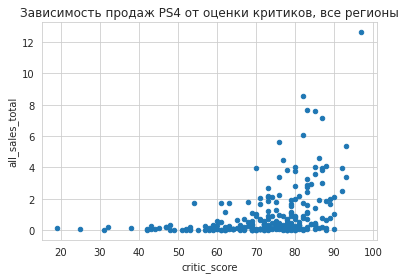

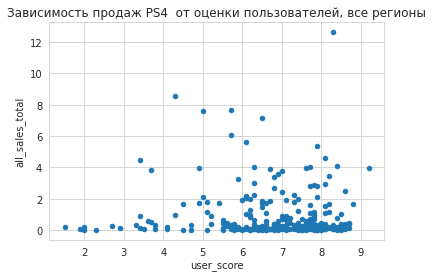

In [38]:
data_ps4.query('critic_score != "unknown"').plot(kind='scatter', x='critic_score', y='all_sales_total', grid=True, 
                                                 title='Зависимость продаж PS4 от оценки критиков, все регионы')


data_ps4.query('user_score != "unknown"').plot(kind='scatter', x='user_score', y='all_sales_total', grid=True, 
                                               title='Зависимость продаж PS4  от оценки пользователей, все регионы');


На графиках видно, что продажи никогда не бывают высокими, если оценка критиков низкая. Это не всегда бывает так при низкой оценке пользователей. Некоторые игры, низко оцененные пользователями, тем не менее хорошо продаются.

То же должно быть верно и для других платформ: при выборе игр для продажи, ориентироваться стоит в первую очередь на рейтинг критиков. Проверим эту версию на грaфиках для других популярных платформ:

In [39]:
platforms = ["XOne", "3DS", "PC", "WiiU"]
data_other_platforms = data_actual.query('platform in @platforms & critic_score != "unknown" & user_score != "unknown"')

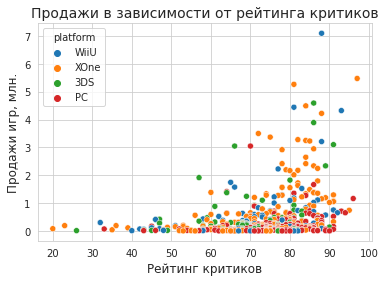

In [40]:
sns.scatterplot(x="critic_score", y="all_sales_total", data=data_other_platforms, hue = 'platform' , marker = 'o')
sns.set_style("white")
plt.xlabel("Рейтинг критиков", fontsize= 12)
plt.ylabel("Продажи игр, млн.", fontsize= 12)
plt.title("Продажи в зависимости от рейтинга критиков", fontsize= 14)
plt.show()

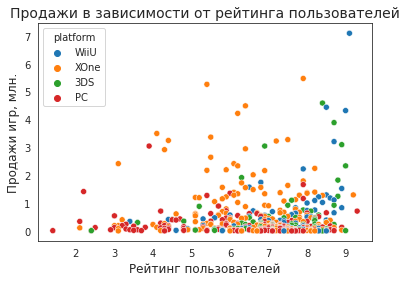

In [41]:
sns.scatterplot(x="user_score", y="all_sales_total", data=data_other_platforms, hue = 'platform' , marker = 'o')
sns.set_style("white")
plt.xlabel("Рейтинг пользователей", fontsize= 12)
plt.ylabel("Продажи игр, млн.", fontsize= 12)
plt.title("Продажи в зависимости от рейтинга пользователей", fontsize= 14)
plt.show()

Та же тенденция наблюдается и у других известных платформ. Продажи строже коррелируют с рейтингом критиков, чем с рейтингом пользователей. Некоторые продажи были высокими, несмотря на низкую оценку игры пользователями, но такого не случалось с играми, низко оцениваемыми критиками.

#### Общее распределение игр по жанрам

Построим таблицу и диаграмму с самыми прибыльными жанрами за 2016 год:

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


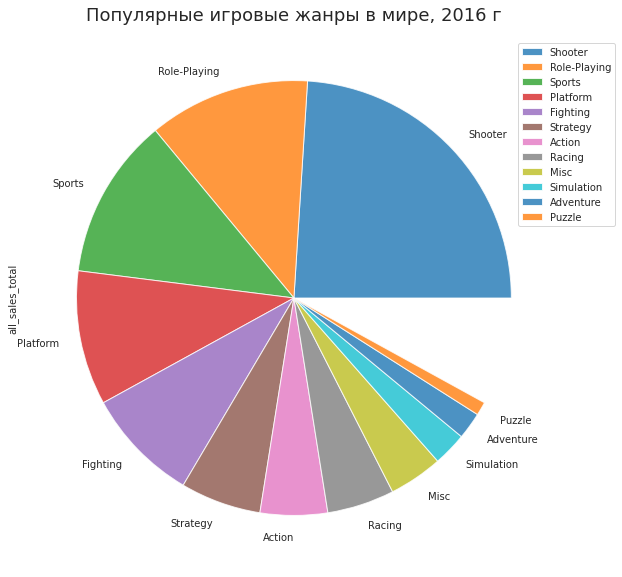

In [58]:
data_genres = data.query('year_of_release == 2016')
data_genres_pie = data_genres.pivot_table(index='genre', values='all_sales_total', 
                                aggfunc='median').sort_values('all_sales_total', ascending=False)

plt = data_genres_pie.plot( kind='pie', y='all_sales_total', figsize=(10, 10), wedgeprops={'alpha':0.8})
plt.set_title('Популярные игровые жанры в мире, 2016 г', fontsize=18)
plt.legend(bbox_to_anchor=(1.1,0.8), loc="center right");


По суммарной прибыли, самых прибыльных жанров четыре - 'Shooter', 'Action', 'Sports', 'Role-Playing'.

Построим catplot для жанров, чтобы визуализировать выбросы и медианы продаж:

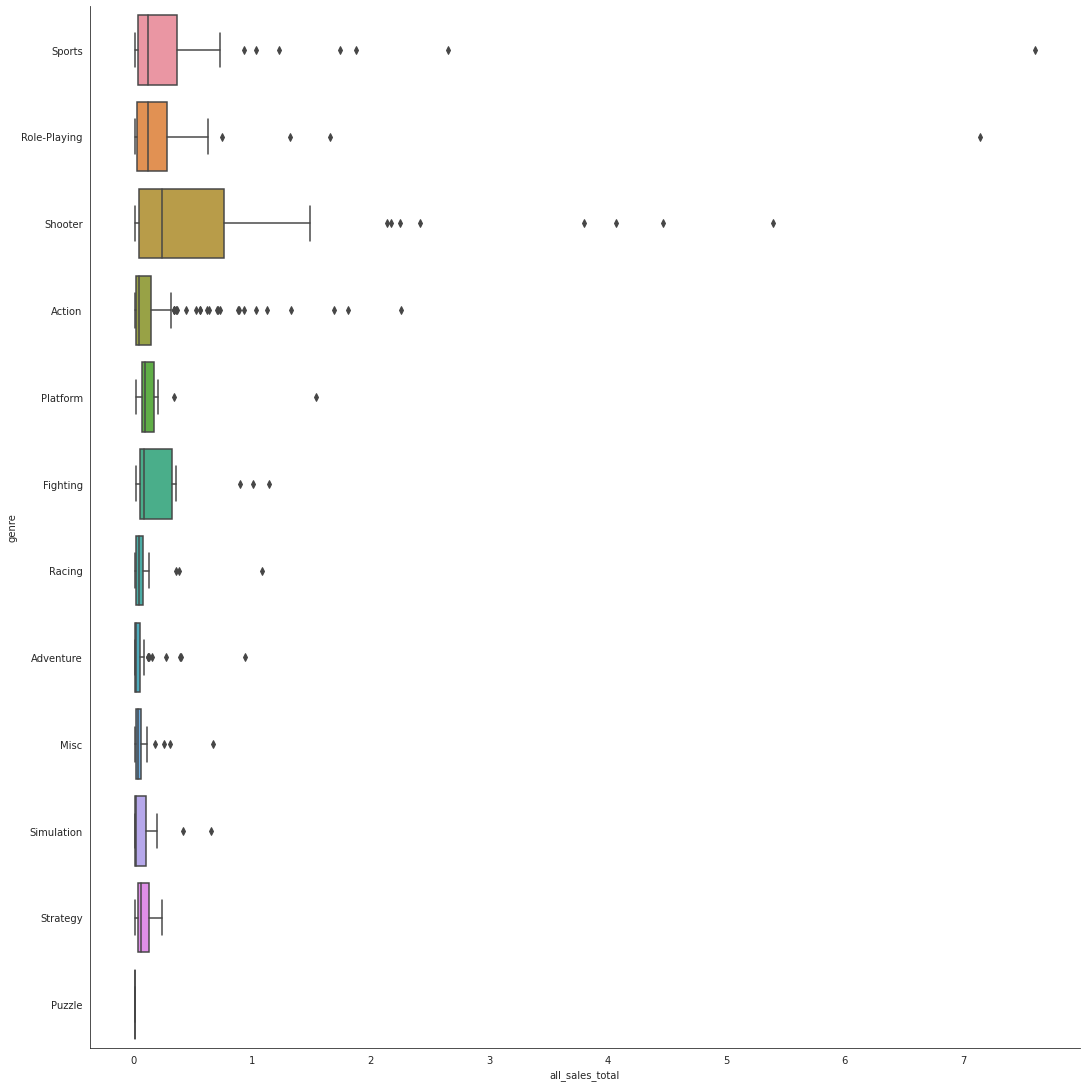

In [43]:
data_genres_catplot = data.query('year_of_release == 2016')
sns.catplot(y='genre', x='all_sales_total', data=data_genres_catplot, kind='box', height=15, aspect=1);
fig.suptitle('Количество продаж по платформам, 2016 г.' + '\n');

Применим xlim, чтобы лучше рассмотреть медианы:

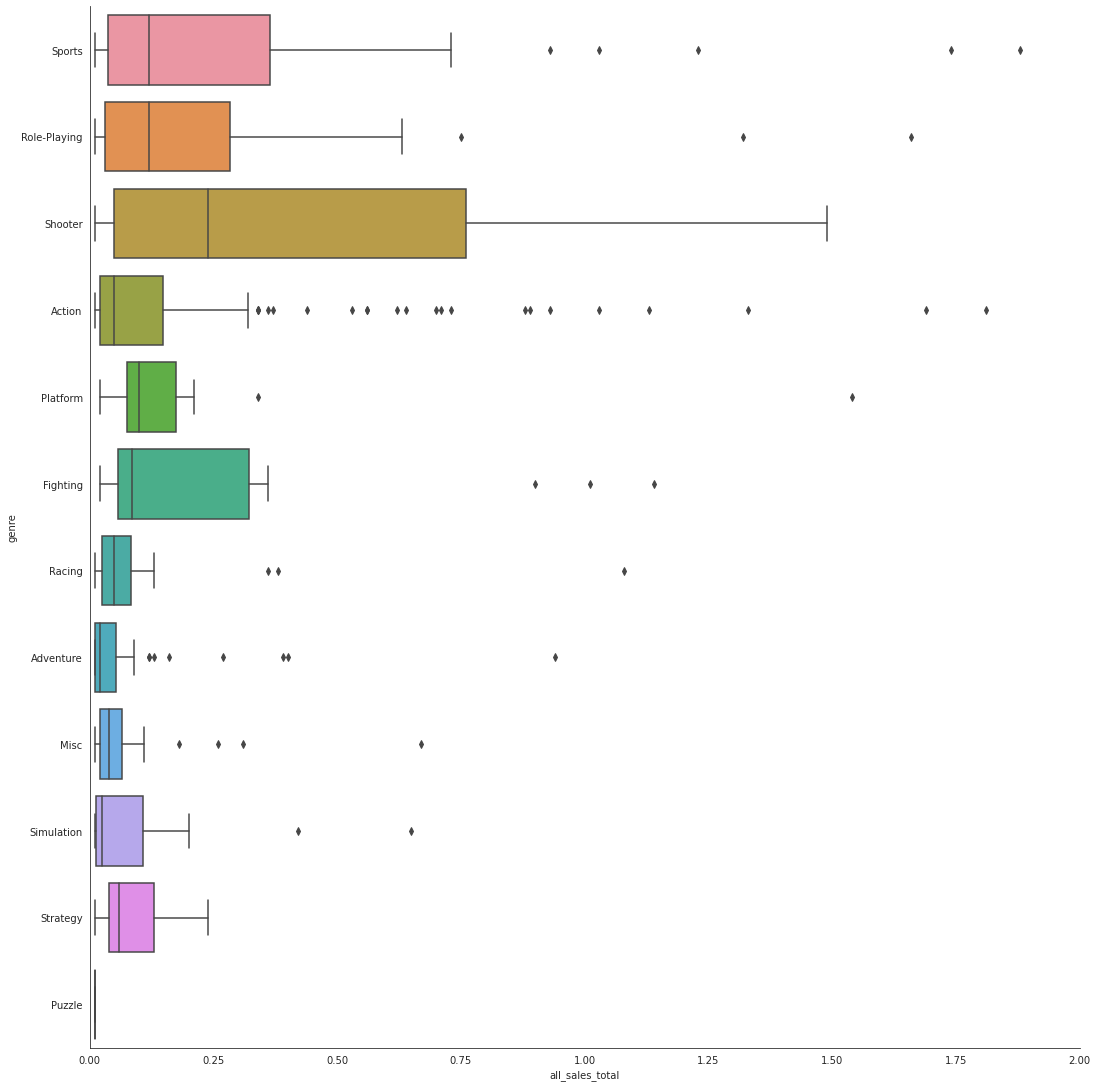

In [44]:
data_genres_catplot = data.query('year_of_release == 2016')
g = sns.catplot(y='genre', x='all_sales_total', data=data_genres_catplot, kind='box', height=15, aspect=1);
g.set(xlim=(0, 2))
fig.suptitle('Количество продаж по платформам, 2016 г.' + '\n');

Если по  суммарной прибыли самых прибыльных жанров было четыре - 'Shooter', 'Action', 'Sports', 'Role-Playing', на этом графике мы видим лидеров по медиане - это опять же 'Shooter', 'Sports', 'Role-Playing'. 
У жанра 'Action' высокая суммарная прибыль за счет множества выбросов, но довольно низкая медиана. 
У жанра 'Platform' медиана сравнива с медианами 'Sports' и 'Action'; за счет отсутствия выбросов суммарная прибыль не очень высокая.


Если принять во внимание и стабильность продаж и высокий доход, наиболее прибыльными являются жанры -  'Shooter', 'Sports', 'Role-Playing', 'Platform', 'Fighting'.

### Вывод

Проанализировав продажи за все годы, мы сделали следующие выводы:
- рост количества новых игр продолжался с 1993 по 2011 год. С 2011 года, продажи пошли на спад, который продолжается до сих пор
- за прошедшие годы, следующие платформы вошли в топ-6 мировых лидеров: PS2, X360, PS3, Wii, DS, PS
- каждая платформа проходит свой пик популярности, после чего продажи начинают падать. В среднем, 'жизненный цикл'  платформы составляет около 10 лет
- эта тенденция спада коррелирует с данными за прошедшие несколько лет. Нет ни одной платформы, чьи продажи бы возросли с 2015 по 2016 год. Тем не менее, некоторые платформы пока не исчерпали свой потенциал и могут быть рекомендованы к продажам в 2017 году. Это платформы PS4, XOne, 3DS, PC, WiiU.
- показатели продаж больше коррелируют с рейтингами критиков, чем с рейтингами пользователей. Япония - единственная страна, где рейтинги пользователей имеют влияние (хоть и слабое) на продажи
- пять наиболее прибыльных игровых жанров в 2016 году - 'Shooter', 'Sports', 'Role-Playing', 'Platform', Fighting'.


##  Портрет пользователя каждого региона

Определим портрет пользователя каждого региона. Найдем топ-5 самых популярных жанров и платформ для каждого региона (NA, EU, JP) в 2016 году. Потом определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Предпочтения пользователей в Северной Америке

Среди пользователей в Северной Америке популярны такие же жанры, как и в мире в целом - 'Shooter', 'Action', 'Sports', 'Role-Playing', 'Fighting'. Аналогичны и предпочтения среди платформ - топ-5 в Северной Америке также является топ-5 в мире.

In [45]:
data_na = data.query('year_of_release == 2016')
data_na_genre = data_na.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().head(5)

data_na_genre.head(5)


,genre,na_sales
0,Shooter,16.24
1,Action,9.29
2,Sports,7.54
3,Role-Playing,5.89
4,Fighting,1.84


In [46]:
data_na_platform = data_na.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().head(5)
data_na_platform.head(5)

,platform,na_sales
0,PS4,21.49
1,XOne,14.27
2,3DS,4.14
3,WiiU,2.10
4,PC,1.36


###  Предпочтения пользователей  в ЕС

Tоп-4 игр в ЕС такие же, как и в мире, но пятое место занимает жанр 'Racing', а не 'Fighting', как во всем мире. Кроме того, в Европе предпочитают жанр  'Sports' жанру 'Action', а в мире эти жанры занимают 3е и 2е место соответственно.

In [47]:
data_eu = data.query('year_of_release == 2016')
data_eu_genre = data_eu.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().head(5)

data_eu_genre.head(5)

,genre,eu_sales
0,Shooter,15.90
1,Sports,12.01
2,Action,10.68
3,Role-Playing,4.28
4,Racing,1.77


Топ-5 платформ в ЕС такие же, как в мире и в Северной Америке.

In [48]:
data_eu_platform = data_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().head(5)
data_eu_platform.head(5)

,platform,eu_sales
0,PS4,31.78
1,XOne,9.63
2,PC,3.53
3,3DS,2.33
4,WiiU,1.48


### Предпочтения пользователей в Японии

В Японии вкусы пользователей отличаются от мировых: в пятерку лидеров вошли жанры 'Adventure' и 'Misc', менее популярные в мире. И наоборот, популярные в мире жанры 'Sports' и 'Fighting' в Японии не вошли в топ-5.

In [49]:
data_jp = data.query('year_of_release == 2016')
data_jp_genre = data_jp.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().head(5)

data_jp_genre.head(5)

,genre,jp_sales
0,Action,7.07
1,Role-Playing,6.61
2,Adventure,1.18
3,Shooter,1.06
4,Misc,1.04


 В японский топ-5 платформ вошли PSV  и PS3, которые не так популярны за пределами Японии. В то же время, в топ японских платформ не вошли популярные в Америке и Европе XOne и PC.

In [50]:
data_jp_platform_top_5 = data_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().head(5)
data_jp_platform_top_5.head(10)

,platform,jp_sales
0,3DS,8.03
1,PS4,5.74
2,PSV,3.56
3,PS3,1.30
4,WiiU,0.67


### Предпочтения пользователей в других регионах

В других регионах, жанровые предпочтения такие же, как и в мире. В топ-5 вошли жанры 'Shooter', 'Action', 'Sports', 'Role-playing', 'Fighting'. Топ-5 платформ такой же, как и топ-5 в мире, за исключением PS3 - ee место в мировом рейтинге занимает WiiU.

In [51]:
data_others = data.query('year_of_release == 2016')
data_others_genre = data_na.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False).reset_index().head(5)

data_others_genre.head(5)

,genre,other_sales
0,Shooter,5.02
1,Action,3.07
2,Sports,3.02
3,Role-Playing,1.40
4,Fighting,0.54


In [52]:
data_other_platform_top_5 = data_others.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False).reset_index().head(5)
data_other_platform_top_5.head(10)

,platform,other_sales
0,PS4,10.24
1,XOne,2.24
2,3DS,0.64
3,PS3,0.37
4,PC,0.36


In [53]:
data_na_platform.head(5)

,platform,na_sales
0,PS4,21.49
1,XOne,14.27
2,3DS,4.14
3,WiiU,2.10
4,PC,1.36


#### Визуализация портретов пользователей

Построим круговые диаграммы с визуализацией предпочтений пользователей:

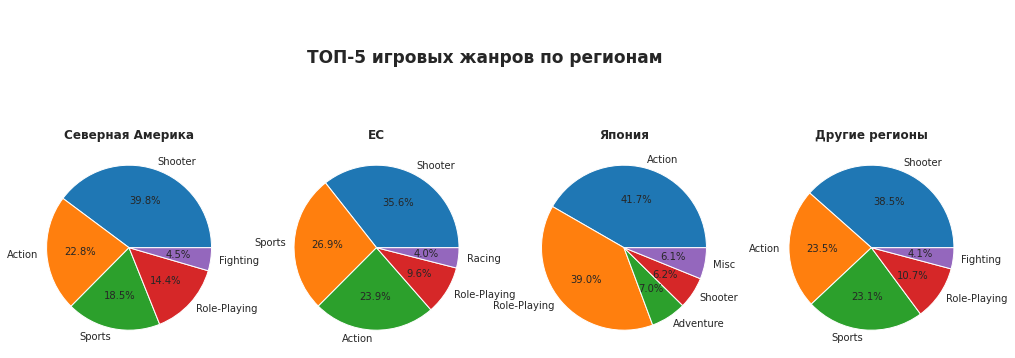

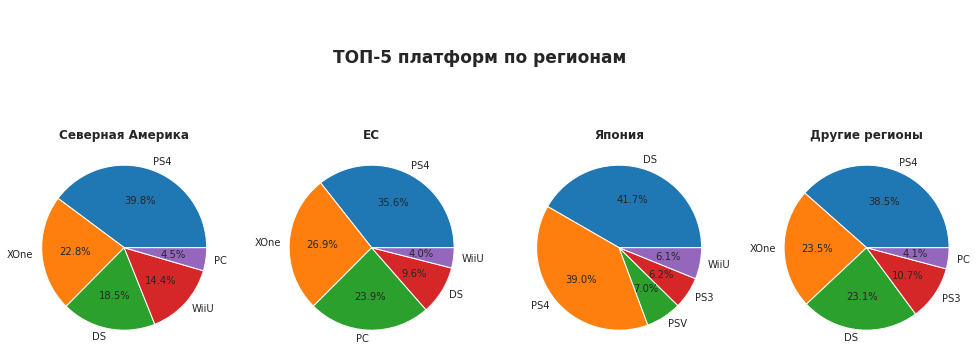

In [54]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(17, 7))


axis[0].pie(data_na_genre['na_sales'], labels=['Shooter', 'Action', 'Sports','Role-Playing','Fighting'], autopct='%1.1f%%')
axis[0].set_title("Северная Америка", weight='bold')

axis[1].pie(data_eu_genre['eu_sales'], labels=['Shooter', 'Sports', 'Action', 'Role-Playing', 'Racing'], autopct='%1.1f%%')
axis[1].set_title("ЕС", weight='bold')

axis[2].pie(data_jp_genre['jp_sales'], labels=['Action', 'Role-Playing', 'Adventure', 'Shooter', 'Misc' ], autopct='%1.1f%%')
axis[2].set_title("Япония", weight='bold')

axis[3].pie(data_others_genre['other_sales'], labels=['Shooter', 'Action', 'Sports','Role-Playing','Fighting'], autopct='%1.1f%%')
axis[3].set_title("Другие регионы", weight='bold')

plt.suptitle('\n' + '\n' + 'ТОП-5 игровых жанров по регионам'+ '\n', fontsize=17, weight='bold')

fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(17, 7))


axis[0].pie(data_na_genre['na_sales'], labels = ['PS4', 'XOne', 'DS', 'WiiU', 'PC'], autopct='%1.1f%%')
axis[0].set_title("Северная Америка", weight='bold')

axis[1].pie(data_eu_genre['eu_sales'], labels = ['PS4', 'XOne', 'PC', 'DS', 'WiiU'], autopct='%1.1f%%')
axis[1].set_title("ЕС", weight='bold')

axis[2].pie(data_jp_genre['jp_sales'], labels=['DS', 'PS4', 'PSV', 'PS3', 'WiiU'], autopct='%1.1f%%')
axis[2].set_title("Япония", weight='bold')

axis[3].pie(data_others_genre['other_sales'], labels=['PS4', 'XOne', 'DS', 'PS3', 'PC'], autopct='%1.1f%%')
axis[3].set_title("Другие регионы", weight='bold');

plt.suptitle('\n' + '\n' +'ТОП-5 платформ по регионам' + '\n', fontsize=17, weight='bold')
             
plt.show()


### Влияние рейтинга ESRB

Влияет ли рейтинг ESRB на продажи в отдельном регионе? Проанализируем продажи в разных регионах в зависимости от рейтинга. В 2016 году рейтинги ESRB присуждались всего по 4 категориям: 'E', 'E10+', 'M' и 'T'. Многие игры не получили рейтинга - это категория 'unknown':

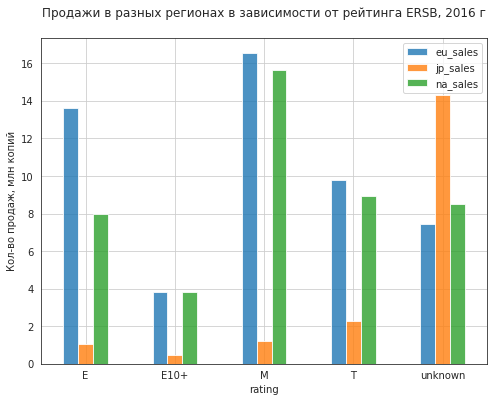

In [55]:
data_esrb = data.query('year_of_release == 2016')
(data_esrb
 .pivot_table(columns='rating', values=['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
 .T
 .plot(kind='bar', ylabel ='Кол-во продаж, млн копий', figsize= (8,6), alpha=0.8, grid=True,
       title='Продажи в разных регионах в зависимости от рейтинга ERSB, 2016 г' + '\n', rot=360)
)
plt.show()


Не во всех регионах продажи  зависят от рейтингов ESRB. В Японии самые большие продажи - в категории 'unknown', в Северной Америке и ЕС - в категории 'M'. Игры категории 'E' намного более популярны в ЕС, чем в Северной Америке.
Судя по графику, рейтинг ESRB относится, в основном, к европейскому и американскому рынку. В Японии большая часть игр не имеет рейтинга ESRB.

###  Вывод

Мы проанализировали предпочтения пользователей из трех регионов - Северной Америки, Европы и Японии и выяснили, что предпочтения в Северной Америке и Европе схожи, но отличаются от японских:

- В европейский и американский топ-5 платформ в 2016 году вошли PS4, XOne, 3DS, WiiU, PC.  
- В японский топ-5 платформ в 2016 году вошли PSV  и PS3, которые не так популярны за пределами Японии. В то же время, в топ японских платформ не вошли популярные в Америке и Европе XOne и PC.
- В 2016 году топ-4 жанров в Америке и  ЕС одинаковые и включают 'Shooter', 'Action', 'Sports', 'Role-Playing'. Пятое место в Европе занимает  жанр 'Racing', а в США -  'Fighting'.
- В Японии вкусы пользователей отличаются от мировых: в пятерку лидеров вошли жанры 'Adventure' и 'Misc', не очень популярные в мире. И наоборот, популярные в мире жанры 'Sports' и 'Fighting' в Японии не вошли в топ 5.
- Не во всех регионах продажи  зависят от рейтингов ESRB. В Японии самые большие продажи - в категории игр без рейтинга, в Северной Америке и ЕС - в категории 'M'. 


## Проверка гипотез

Проверим гипотезы:  
- cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- cредние пользовательские рейтинги жанров Action  и Sports  разные.

### Гипотеза 1: cредние пользовательские рейтинги платформ Xbox One и PC за 2016 год

Проверим гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чтобы подтвердить это, нужно отвергнуть гипотезу H₀:

H₀ - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H₁ - cредние пользовательские рейтинги платформ Xbox One и PC отличаются

Нам интересны различия в обе стороны - меньшую и большую, поэтому гипотеза H₁ двусторонняя.

H₀ всегда формулируется так, чтобы использовать знак равенства.

H₁ - альтернативная гипотеза, которая противоречит нулевой гипотезе, — либо нулевая гипотеза не отвергается, либо отвергается и принимается H₁.

Возьмем стандартный уровень критической значимости alpha - 0.05.

Используем ttest для двух независимых совокупностей 'ind'. Используем ttest для двух независимых совокупностей 'ind'. Перед тестом избавимся от пропусков в столбце, чтобы они не влияли на расчеты:

In [56]:

data_xbox = data_actual.query('platform == "XOne" & user_score != "unknown"')
data_pc = data_actual.query('platform == "PC" & user_score != "unknown"')

data_xbox_rating = data_xbox['user_score']
data_pc_rating = data_pc['user_score'] 


print('cреднее xbox:',pd.Series(data_xbox_rating).mean())
print('cреднее pc:',pd.Series(data_pc_rating).mean())

alpha = .05 
results = st.ttest_ind(
    data_xbox_rating,
    data_pc_rating)

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



cреднее xbox: 6.52142857142857
cреднее pc: 6.269677419354836
p-значение: 0.14012658403611525
Не получилось отвергнуть нулевую гипотезу



Мы получили p-value равное 0.14 . 

P-value – это вероятность получить значение статистики критерия равное наблюдаемому или более нетипичное по сравнению с наблюдаемым при условии, что нулевая гипотеза верна. 

То есть при  условии, что нулевая гипотеза верна, вероятность получить такое или большее значение равна 0.14, что больше заданного уровня критической значимости 0.05.

Значит, нет основания отбросить нулевую гипотезу.


### Гипотеза 2: cредние пользовательские рейтинги жанров Action  и Sports за 2016 год

Проверим гипотезу: cредние пользовательские рейтинги жанров Action и Sports разные.

Чтобы подтвердить это, нужно отвергнуть гипотезу H₀:

H₀ - cредние пользовательские рейтинги жанров Action и Sports одинаковые.  
H₁ - cредние пользовательские рейтинги жанров Action и Sports разные.

Нам интересны различия в обе стороны - меньшую и большую, поэтому гипотеза H₁ двусторонняя.

H₀ всегда формулируется так, чтобы использовать знак равенства.

H₁ - альтернативная гипотеза, которая противоречит нулевой гипотезе, — либо нулевая гипотеза не отвергается, либо отвергается и принимается H₁.

Возьмем стандартный уровень критической значимости alpha - 0.05.

Используем ttest для двух независимых совокупностей 'ind'. Перед тестом избавимся от пропусков в столбце, чтобы они не влияли на расчеты:

In [57]:
data_action = data_actual.query('genre == "Action" & user_score != "unknown"')
data_sports = data_actual.query('genre == "Sports" & user_score != "unknown"')

data_action_rating = data_action['user_score']
data_sports_rating = data_sports['user_score']


print('cреднее Action:',pd.Series(data_action_rating).mean())
print('cреднее Sports:',pd.Series(data_sports_rating).mean())

alpha = 0.05 
results = st.ttest_ind(
    data_action_rating,
    data_sports_rating)

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее Action: 6.837532133676097
cреднее Sports: 5.238124999999999
p-значение: 1.0517832389135652e-27
Отвергаем нулевую гипотезу


Мы получили p-value бликое к 0, то есть при условии, что нулевая гипотеза верна, вероятность получить такое или большее различие случайно стремится к 0. Это ниже уровня критической значимости alpha 0.05.  Значит, есть основание отбросить нулевую гипотезу, которая утверждает,  что рейтинги одинаковые.

## Вывод

Был проанализирован датасет с данными из открытых источников, содержащие сведения о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Проведена следующая работа:
- данные подготовлены к обработке (обработаны пропуски, создан столбец с суммарными продажами
- проанализированые данные продаж за весь период (выявлен жизненный цикл платформы, лидеры продаж за все время, влияние отзывов критиков и пользователей на продажи)
- составлен портрет пользователей разных регионов (Северная Америка, Япония, ЕС). Проанализированы предпочтения по жанрам и платформам
- проанализировано влияние рейтинга ESRB
- проверены 2 гипотезы - о рейтингах платформ Xbox One и PC и о рейтингах жанров Action и Sports

Были сделаны следующие выводы:

- рост количества новых игр продолжался с 1993 по 2011 год. С 2011 года, продажи пошли на спад, который продолжается до сих пор
- за прошедшие годы, следующие платформы вошли в топ-6 мировых лидеров: PS2, X360, PS3, Wii, DS, PS
- каждая платформа проходит свой пик популярности, после чего продажи начинают падать. В среднем, 'жизненный цикл'  платформы составляет около 10 лет
- эта тенденция спада коррелирует с данными за прошедшие несколько лет. Нет ни одной платформы, где продажи бы возросли с 2015 по 2016 год. Тем не менее, некоторые платформы пока не исчерпали свой потенциал и могут быть рекомендованы к продажам в 2017 году. Это платформы PS4, XOne, 3DS, PC, WiiU.
- показатели продаж больше коррелируют с рейтингами критиков, чем с рейтингами пользователей. Япония - единственная страна, где рейтинги пользователей имеют влияние (хоть и слабое) на продажи
- пять наиболее прибыльных игровых жанров в 2016 году - 'Shooter', 'Sports', 'Role-Playing', 'Platform', Fighting'.
- В европейский и американский топ-5 платформ в 2016 году вошли PS4, XOne, 3DS, WiiU, PC.  
- В японский топ-5 платформ в 2016 году вошли PSV  и PS3, которые не так популярны за пределами Японии. В то же время, в топ японских платформ не вошли популярные в Америке и Европе XOne и PC.
- В 2016 году топ-4 жанров в Америке и  ЕС одинаковые и включают 'Shooter', 'Action', 'Sports', 'Role-Playing'. Пятое место в Европе занимает  жанр 'Racing', а в США -  'Fighting'.
- В Японии вкусы пользователей отличаются от мировых: в пятерку лидеров вошли жанры 'Adventure' и 'Misc', не очень популярные в мире. И наоборот, популярные в мире жанры 'Sports' и 'Fighting' в Японии не вошли в топ 5.
-  Не во всех регионах продажи  зависят от рейтингов ESRB. В Японии самые большие продажи - в категории игр без рейтинга, в Северной Америке и ЕС - в категории 'M'. 


Рекламную компанию стоит планировать, принимая во внимание рейтинги жанров и платформ за последний год, также с учетом аудитории сайта (предпочтения пользователей в разных регионах различны). Следует принимать во внимание оценку критиков, так как оценка достаточно сильно коррелирует с уровнем продаж.